In [1]:
import numpy as np
import matplotlib.pyplot as plt


def pulso(voltaje=0.01, risetime=0):
    tiempo = 5000
    risetime = int(risetime * voltaje)
    rampa_baja = np.zeros((1,tiempo), dtype = np.float64)  
    rampa_alta = np.zeros((1,tiempo), dtype = np.float64)
    rampa_alta[...] = voltaje
    if risetime !=0:
        flanco = np.linspace(0,voltaje,risetime)
        rampa_alta = np.append(flanco, rampa_alta)
        z=np.concatenate((rampa_baja,rampa_alta), axis=None)  
        return z[tiempo-100:tiempo+len(flanco)+100]
    z = np.append(rampa_baja, rampa_alta)
    return z
    

risetime = 4400
escalon = pulso(0.010, risetime)
largo = len(escalon)
tiempo = np.linspace(0,largo, largo, endpoint=True) # 1 segundo en pasos de 1 ns

deriv_escalon = np.gradient(escalon, tiempo)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), dpi=80, sharex=True)
ax1.set_title('Escalón de potencial (Rise Time: {} ns * Volt)'.format(risetime)) 
ax1.plot(tiempo, escalon, color="red")
ax1.set_ylabel('Potencial (V)')
ax1.grid(True)

ax2.plot(tiempo, deriv_escalon)
ax2.set_title('Derivada del escalón de potencial con respecto al tiempo')

ax2.set_xlabel('Tiempo (ns)')
ax2.set_ylabel('dVdt (V)')
ax2.grid(True)
#ax2.set_xlim(150,250)
plt.show()

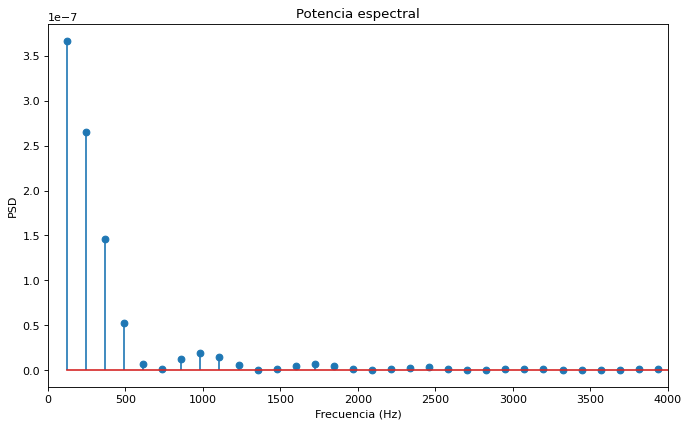

In [2]:

n = len(deriv_escalon)
fftV = np.fft.fft(deriv_escalon,n)   # Calculo la transformada rápida de Fourier


PSD = fftV *np.conj(fftV) / n      # Espectro de Potencia (potencia por frecuencias)

sampletime = 3.33340e-5

freq = 1 / (n * sampletime) * np.arange(n)    # Genero el rango de frecuencias
L = np.arange(1, np.floor(n/2), dtype='int') # Tomo la mitad del espectro

fig, ax = plt.subplots(figsize=(10, 6), dpi=80)
ax.set_title('Potencia espectral')
ax.stem(freq[L], PSD[L].real)
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('PSD')


ax.set_xlim(0,4000)
#ax.set_ylim(0,0.2e-8)


plt.show()

**Simulo resistencia de 2 KOhm**

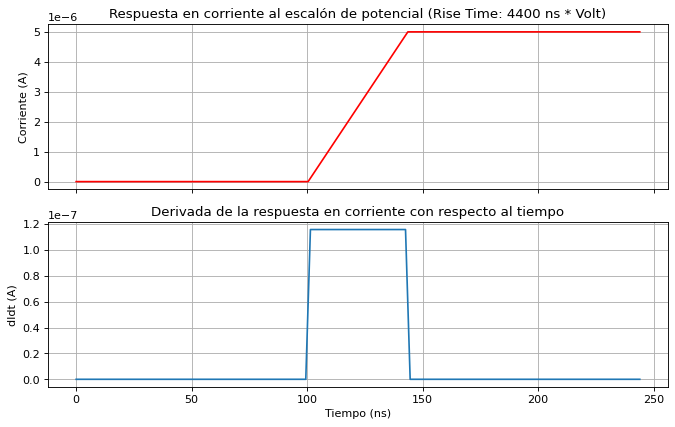

In [3]:
R = 2000
I = escalon / R

deriv_I = np.gradient(I, tiempo)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), dpi=80, sharex=True)
ax1.set_title('Respuesta en corriente al escalón de potencial (Rise Time: {} ns * Volt)'.format(risetime)) 
ax1.plot(tiempo, I, color="red")
ax1.set_ylabel('Corriente (A)')
ax1.grid(True)

ax2.plot(tiempo, deriv_I)
ax2.set_title('Derivada de la respuesta en corriente con respecto al tiempo')

ax2.set_xlabel('Tiempo (ns)')
ax2.set_ylabel('dIdt (A)')
ax2.grid(True)
#ax2.set_xlim(150,250)
plt.show()

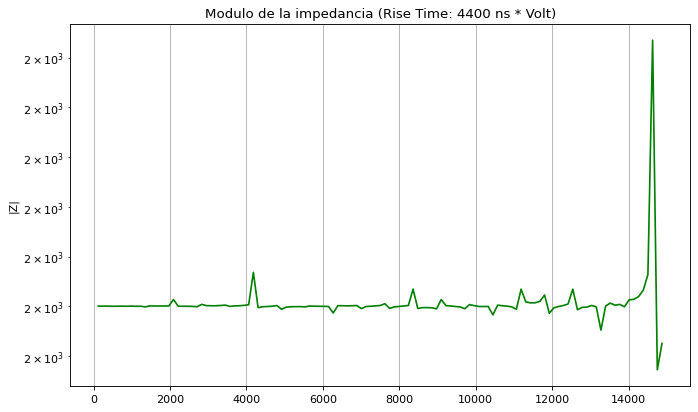

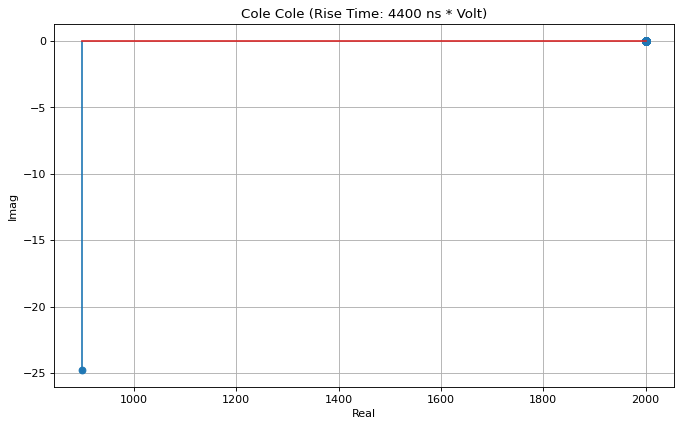

In [4]:
fftI = np.fft.fft(deriv_I,n)   # Calculo la transformada rápida de Fourier
Z = fftV / fftI

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6), dpi=80)
ax1.set_title('Modulo de la impedancia (Rise Time: {} ns * Volt)'.format(risetime)) 
ax1.semilogy(freq[L], np.abs(Z[L]), color="green")
ax1.set_ylabel('|Z|')
ax1.grid(True)
#ax1.set_xlim(0,10000)

plt.show()

fig, (ax) = plt.subplots(figsize=(10, 6), dpi=80)
ax.set_title('Cole Cole (Rise Time: {} ns * Volt)'.format(risetime)) 
ax.stem(Z.real, -(Z.imag))
ax.set_ylabel('Imag')
ax.set_xlabel('Real')
ax.grid(True)
plt.show()


In [5]:
1/ (2 * 3.33340e-5)

14999.700005999879